In [1]:
import numpy as np
from sklearn.decomposition import PCA
import scipy.io
import itertools
import os
import h5py
import pyret
import binary     # in igor >> recording

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
from matplotlib.pyplot import *

# note that nonposx(y) for log plots will no longer work with this package
import mpld3
#mpld3.enable_notebook()

from pylab import rcParams
rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
data_dir = os.path.expanduser('~/Documents/Stanford/00 Baccus Lab/Predictive Coding Correlation Experiments/')

### Load ganglion cell spiking and inhibitory interneuron membrane potential  
ganglion is cell array of which playback experiment (0,1,2) >> which cell (0, ..., 13) >> which spike timestamp  
surround is cell array of which playback experiment (0,1,2) >> membrane potential

In [3]:
ganglion_files = ['012514_ganglions_0.mat','012514_ganglions_1.mat','012514_ganglions_2.mat']
surround_files = ['012514_c1_s0_0_300.txt','012514_c1_s1_0_300.txt','012514_c1_s2_0_300.txt']

ganglion = []
surround = []

# load ganglion cell spiking files
for g_file in ganglion_files:
    tmp = scipy.io.loadmat(data_dir + g_file, squeeze_me=True)
    cells = [tmp['spikes'][:,c][tmp['spikes'][:,c] > 0] for c in range(tmp['spikes'].shape[1])]
    ganglion.append(cells)
    
# load surround membrane potential
for s_file in surround_files:
    tmp = np.loadtxt(data_dir + s_file, dtype='float', skiprows=1)
    surround.append(tmp)

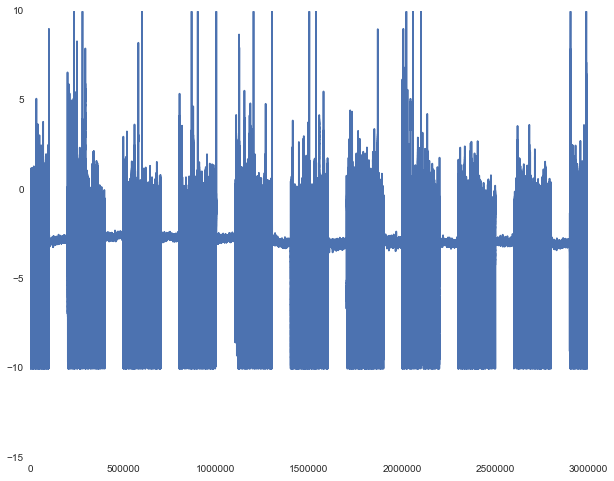

In [4]:
plot(surround[0])

### Copy Table0:info conditions information

In [5]:
control_time_0 = [10.5, 20.]
control_time_1 = [0.5, 10.]
control_time_2 = [20.5, 30.]
amplify_time_0 = [20.5, 30.]
amplify_time_1 = [10.5, 20.]
amplify_time_2 = [0.5, 10.]
diminish_time_0 = [0.5, 10.]
diminish_time_1 = [20.5, 30.]
diminish_time_2 = [10.5, 20.]